In [136]:
import pandas as pd

In [137]:
la_liga_embed = pd.read_csv('la_liga_embeddings.csv', index_col = 'type')
la_liga_embed.head()

,x_0,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,...,x_118,x_119,x_120,x_121,x_122,x_123,x_124,x_125,x_126,x_127
type,,,,,,,,,,,,,,,,,,,,,
68313217,0.153731,-0.904218,-0.179672,-0.501663,-0.254227,0.007321,0.003243,0.035325,-0.380600,0.089760,...,0.245482,-0.042715,-0.525933,-0.157012,-0.513708,0.119596,-0.159953,0.068540,1.034819,0.601535
68313422,-0.233775,-0.179904,-0.402372,-0.112232,-0.230589,0.074034,-0.483319,0.340784,-0.839703,-0.456757,...,0.039374,-0.253005,-0.331597,-0.498555,0.006781,0.116221,0.318195,0.358314,0.673406,0.390506
68314217,0.332383,-0.535935,0.210883,-0.228389,-0.177880,0.072130,0.475470,0.033806,-0.149995,-0.208899,...,0.391354,0.082226,-0.346288,-0.435241,-0.428385,0.375416,0.043474,0.202542,0.615114,0.564081
68314223,0.188398,-0.199538,0.398805,0.194008,0.111617,-0.009330,0.005461,-0.007631,0.109383,-0.720378,...,-0.198889,-0.145832,-0.138276,0.268190,-0.020353,-0.004631,0.136752,-0.070354,0.398084,0.797160
68315217,-0.486598,-0.616188,0.155740,0.295099,-0.058422,-0.196677,0.056917,-0.688728,-0.344926,0.159733,...,-0.192086,-0.347426,-0.079986,-0.310819,0.228664,-0.011043,-0.201643,0.242610,0.338337,0.380575


In [138]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

In [139]:
#tsne = TSNE(n_components=2)
tsne = PCA(n_components=2)

In [140]:
la_liga_tsne = tsne.fit_transform(la_liga_embed)

In [141]:
matches_df

,date,season_id,season_name,home_team_id,home_team_name,away_team_id,away_team_name,home_score,away_score,match_week,ref_id,ref_name,match_url
68313,2004-10-24,37,2004/2005,217,Barcelona,422,Osasuna,3,0,8,994,Vicente José Lizondo Cortés,https://raw.githubusercontent.com/statsbomb/op...
68314,2004-12-04,37,2004/2005,217,Barcelona,223,Málaga,4,0,14,993,José Omar Losantos,https://raw.githubusercontent.com/statsbomb/op...
68315,2004-12-21,37,2004/2005,217,Barcelona,221,Levante,2,1,17,222,David Fernández,https://raw.githubusercontent.com/statsbomb/op...
68316,2005-05-01,37,2004/2005,217,Barcelona,608,Albacete,2,0,34,407,Carlos Velasco Carballo,https://raw.githubusercontent.com/statsbomb/op...
68317,2005-10-01,38,2005/2006,217,Barcelona,395,Real Zaragoza,2,2,6,996,Carlos Megía Dávila,https://raw.githubusercontent.com/statsbomb/op...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
267567,2014-04-20,25,2013/2014,217,Barcelona,215,Athletic Bilbao,2,1,34,207,Juan Martínez,https://raw.githubusercontent.com/statsbomb/op...
267576,2016-01-30,27,2015/2016,217,Barcelona,212,Atlético Madrid,2,1,22,221,Alberto Undiano,https://raw.githubusercontent.com/statsbomb/op...
267597,2015-02-01,26,2014/2015,217,Barcelona,222,Villarreal,3,2,21,882,Iñaki Bikandi,https://raw.githubusercontent.com/statsbomb/op...
267611,2015-09-26,27,2015/2016,217,Barcelona,208,Las Palmas,2,1,6,215,Ricardo De Burgos,https://raw.githubusercontent.com/statsbomb/op...


In [142]:
matches_df = pd.read_csv('data/matches_df.csv', index_col = 'Unnamed: 0')

In [143]:
la_liga_embed.index

Int64Index([  68313217,   68313422,   68314217,   68314223,   68315217,
              68315221,   68316217,   68316608,   68317217,   68317395,
            ...
            2661171049, 2662011042, 2666201049, 2667241043, 2667941042,
            2668151041, 2669211042, 2671381049, 2673431049, 2675061049],
           dtype='int64', name='type', length=696)

In [151]:
teams = []
index = []

for team in la_liga_embed.index:
    team = str(team)
    if len(team)  == 8:
        teams.append(str(team)[-3:])
        index.append(str(team)[:-3])
    elif len(team) > 8:
        teams.append(str(team)[-4:])
        index.append(str(team)[:-4])

        
for idx, team in enumerate(teams):
    if team[0] != '1' and len(team) > 3:
        teams[idx] = team[1:]

In [152]:
teams_dict = {}
for value in matches_df[['home_team_id', 'home_team_name']].drop_duplicates().to_dict(orient = 'index').values():
    teams_dict.update({str(value['home_team_id']): value['home_team_name']})

for value in matches_df[['away_team_id', 'away_team_name']].drop_duplicates().to_dict(orient = 'index').values():
    teams_dict.update({str(value['away_team_id']): value['away_team_name']})
    

In [153]:
new_teams = []

for team in teams:
    try:
        new_teams.append(teams_dict[team])
    except:
        print(team)
        new_teams.append("DELETE")
        continue

1216
1214
1212
1221
1215
1209
1360
1208


In [163]:
la_liga = pd.DataFrame(la_liga_tsne, columns=['0', '1'])
la_liga['team'] = pd.Series(new_teams)
la_liga = la_liga.query('team != "DELETE"')
la_liga['index'] = pd.Series(index, dtype = 'float64')

In [164]:
la_liga.head()

,0,1,team,index
0,-0.603151,0.137537,Barcelona,68313.0
1,-0.338748,0.700434,Osasuna,68313.0
2,-0.970378,-0.424463,Barcelona,68314.0
3,0.971750,-1.018811,Málaga,68314.0
4,-0.117556,0.059134,Barcelona,68315.0


In [171]:
la_liga = la_liga.join(matches_df, on = 'index', lsuffix = 'l', rsuffix = 'r')

In [241]:
la_liga['year'] = pd.to_datetime(la_liga['date']).dt.to_period('Y').dt.strftime('%Y')

In [242]:
la_liga_year = la_liga.groupby(['team', 'year']).agg({'0': ['mean'], '1': ['mean']}).reset_index()
la_liga_year.columns = la_liga_year.columns.map('_'.join)

In [243]:
la_liga_year.head()

,team_,year_,0_mean,1_mean
0,Albacete,2004,-1.030344,-0.448759
1,Albacete,2005,0.094464,0.574316
2,Almería,2007,-0.207594,-0.953557
3,Almería,2008,-0.213173,0.297977
4,Almería,2009,1.128441,0.406558


In [244]:
la_liga_year.dtypes

team_      object
year_      object
0_mean    float64
1_mean    float64
dtype: object

In [245]:
import altair as alt
from vega_datasets import data

# for the notebook only (not for JupyterLab) run this command once per session
alt.renderers.enable('notebook')



RendererRegistry.enable('notebook')

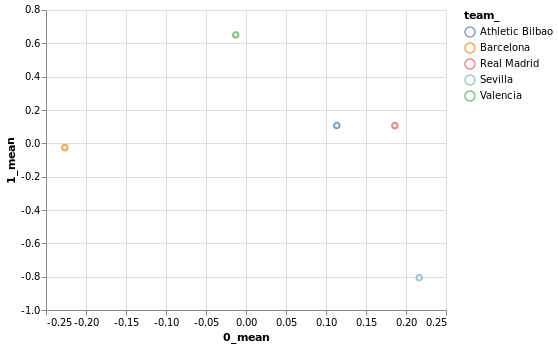

In [262]:
alt.Chart(la_liga_year.query('team_ in ["Barcelona", "Real Madrid", "Sevilla", "Valencia", "Athletic Bilbao"] and year_ == "2012"')).mark_point().encode(
    x='0_mean',
    y='1_mean', 
    color = 'team_')